<a href="https://colab.research.google.com/github/MakamNikitha/hypothyroid-prediction/blob/main/project8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score,recall_score

In [ ]:
dataset = pd.read_csv("/content/hypothyroid.csv")


In [ ]:
dataset.head()

,class,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
dataset = dataset.rename(columns = {dataset.columns[0]:"target"})

In [ ]:
dataset["target"].value_counts()

negative       3012
hypothyroid     151
Name: target, dtype: int64

In [ ]:
dataset["target"] = dataset["target"].map({"negative":0,"hypothyroid":1})

In [ ]:
print("Unique categories in the column 'pregnant'", dataset['pregnant'].unique())

Unique categories in the column 'pregnant' ['f' 't']


In [ ]:
print("Count of categories in the column 'pregnant' \n",dataset["pregnant"].value_counts())

Count of categories in the column 'pregnant' 
 f    3100
t      63
Name: pregnant, dtype: int64


In [ ]:
print("Unique categories in the column 'Sex'", dataset['Sex'].unique())

Unique categories in the column 'Sex' ['M' 'F' '?']


In [ ]:
print("Count of categories in the column 'Sex' \n", dataset["Sex"].value_counts())

Count of categories in the column 'Sex' 
 F    2182
M     908
?      73
Name: Sex, dtype: int64


In [ ]:
dataset = dataset.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})
dataset.head()

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,0,0,0,0,0,0,0,0,...,1,0.6,1,15,1,1.48,1,10,0,?
1,1,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19,1,1.13,1,17,0,?
2,1,24,0,0,0,0,0,0,0,0,...,1,0.2,1,4,1,1,1,0,0,?
3,1,24,1,0,0,0,0,0,0,0,...,1,0.4,1,6,1,1.04,1,6,0,?
4,1,77,0,0,0,0,0,0,0,0,...,1,1.2,1,57,1,1.28,1,44,0,?


In [ ]:
categorical_features=dataset.select_dtypes(exclude='number')
categorical_features.describe()

,Age,Sex,TSH,T3,TT4,T4U,FTI,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163
unique,93,3,240,70,269,159,281,53
top,?,1,0,?,?,?,?,?
freq,446,2182,894,695,249,248,247,2903


In [ ]:
# Checking all the unique values inside categorical features
for feature in categorical_features:
    print('---------------------------------')
    print(f"{feature}:{categorical_features[feature].unique()}")

---------------------------------
Age:['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
---------------------------------
Sex:[0 1 '?']
---------------------------------
TSH:['30' '145' '0' '430' '7.3' '138' '7.7' '21' '92' '48' '36' '15' '15.3'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.4' '126'
 '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.2' '150' '?'
 '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17' '235' '153'
 '13' '31' '109' '260' '43' '12' '11' '55' '6.5' '20' '7.5' '14' '60'
 '140' '33' '8.7' '0.25' '10.7' '82' '45' '42' 

In [ ]:
dataset.replace(to_replace='?', inplace=True, value=np.NaN)
dataset.isnull().sum()

target                          0
Age                           446
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
dataset.drop('TBG', axis = 1, inplace=True)
columns = dataset.columns[dataset.dtypes.eq('object')]
dataset[columns] = dataset[columns].apply(pd.to_numeric, errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     3163 non-null   int64  
 1   Age                        2717 non-null   float64
 2   Sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

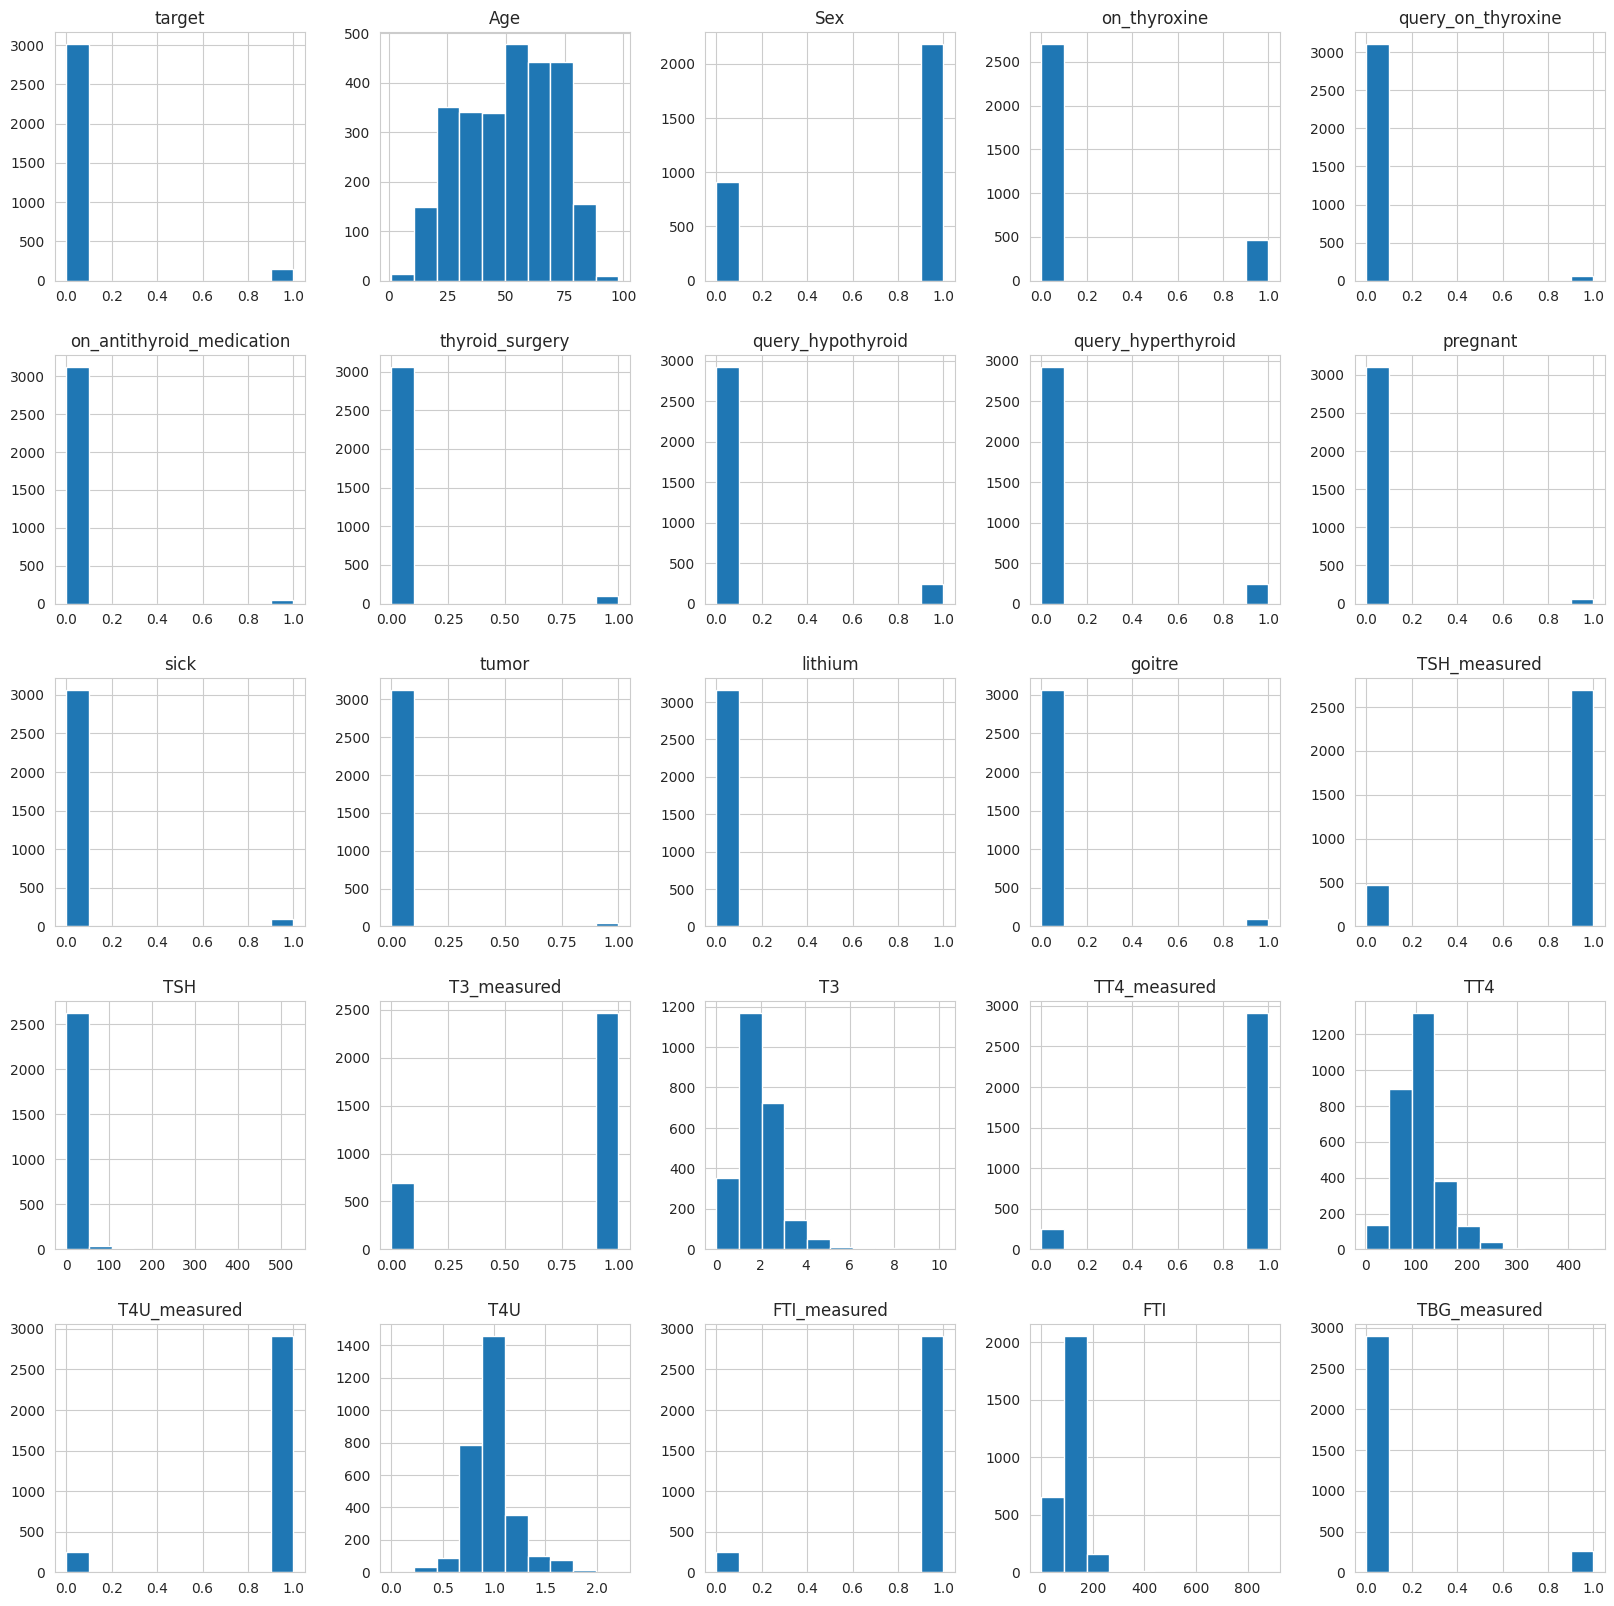

In [ ]:
dataset.hist(figsize = (20,20));

In [ ]:
print(dataset.isna().sum())
print(dataset.describe())

target                         0
Age                          446
Sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64
            target          Age          Sex  on_thyroxine  \
count  3163.000000  2717.000000  3090.000000   3163.000000   
mean      0.047739    51.154214     0.

In [ ]:
X = dataset.drop('target', axis = 1)
y = dataset['target']
print(X.shape, y.shape)

(3163, 24) (3163,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

[[ 0.00915118 -1.56362059 -0.4197584  ...  0.29138576  1.28180584
  -0.30086083]
 [-0.09400759  0.63954134 -0.4197584  ...  0.29138576 -0.0775006
  -0.30086083]
 [-1.486651    0.63954134 -0.4197584  ...  0.29138576 -0.02776987
  -0.30086083]
 ...
 [-1.89928609 -1.56362059 -0.4197584  ... -3.43187671         nan
   3.32379588]
 [-1.22875407  0.63954134 -0.4197584  ...  0.29138576  0.353499
  -0.30086083]
 [-0.91927776  0.63954134 -0.4197584  ...  0.29138576  0.93369078
  -0.30086083]]


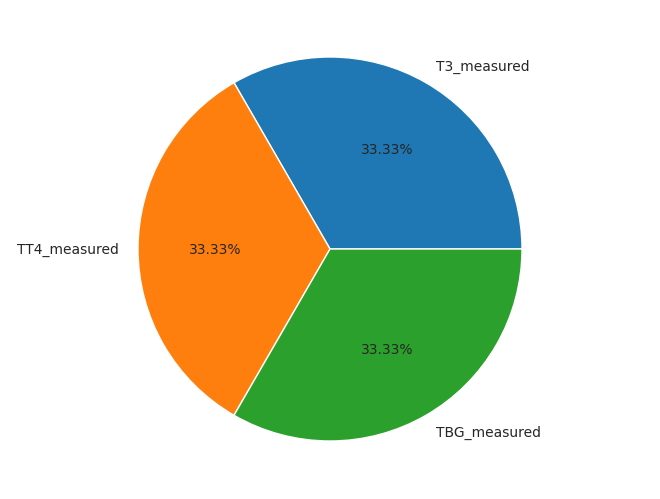

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['T3_measured', 'TT4_measured', 'TBG_measured']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<ipython-input-44-80041f659031>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])
<ipython-input-44-80041f659031>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])
<ipython-input-44-80041f659031>:7: UserWarning: 

`distplot` is a deprecated function and will be removed 

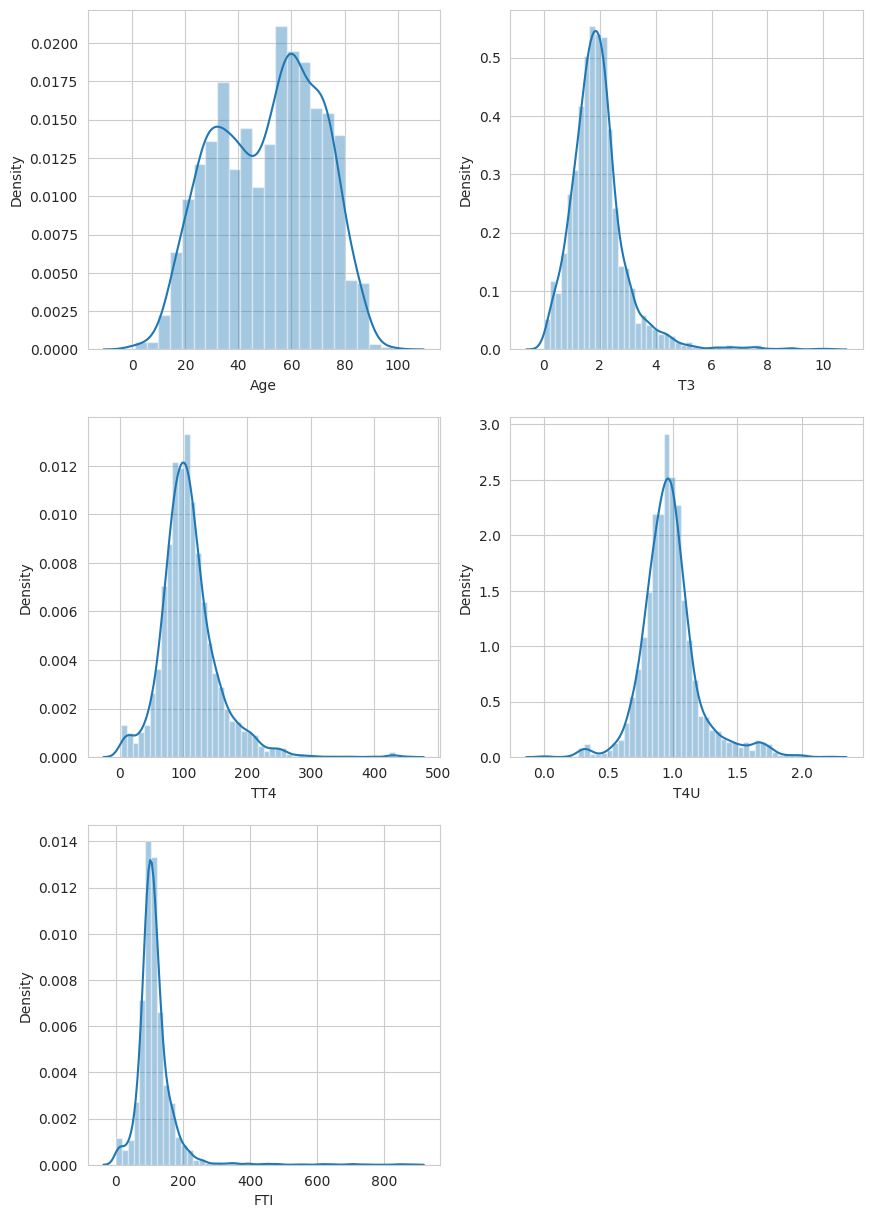

In [ ]:
columns = ['Age','T3','TT4','T4U','FTI']
plt.figure(figsize= (10,15),facecolor = 'white')
plotnumber = 1
for col in columns:
  ax = plt.subplot(3,2,plotnumber)
  #print(new_df[col])
  sns.distplot(dataset[col])
  plt.xlabel(col,fontsize = 10)
  plotnumber+=1
plt.show()

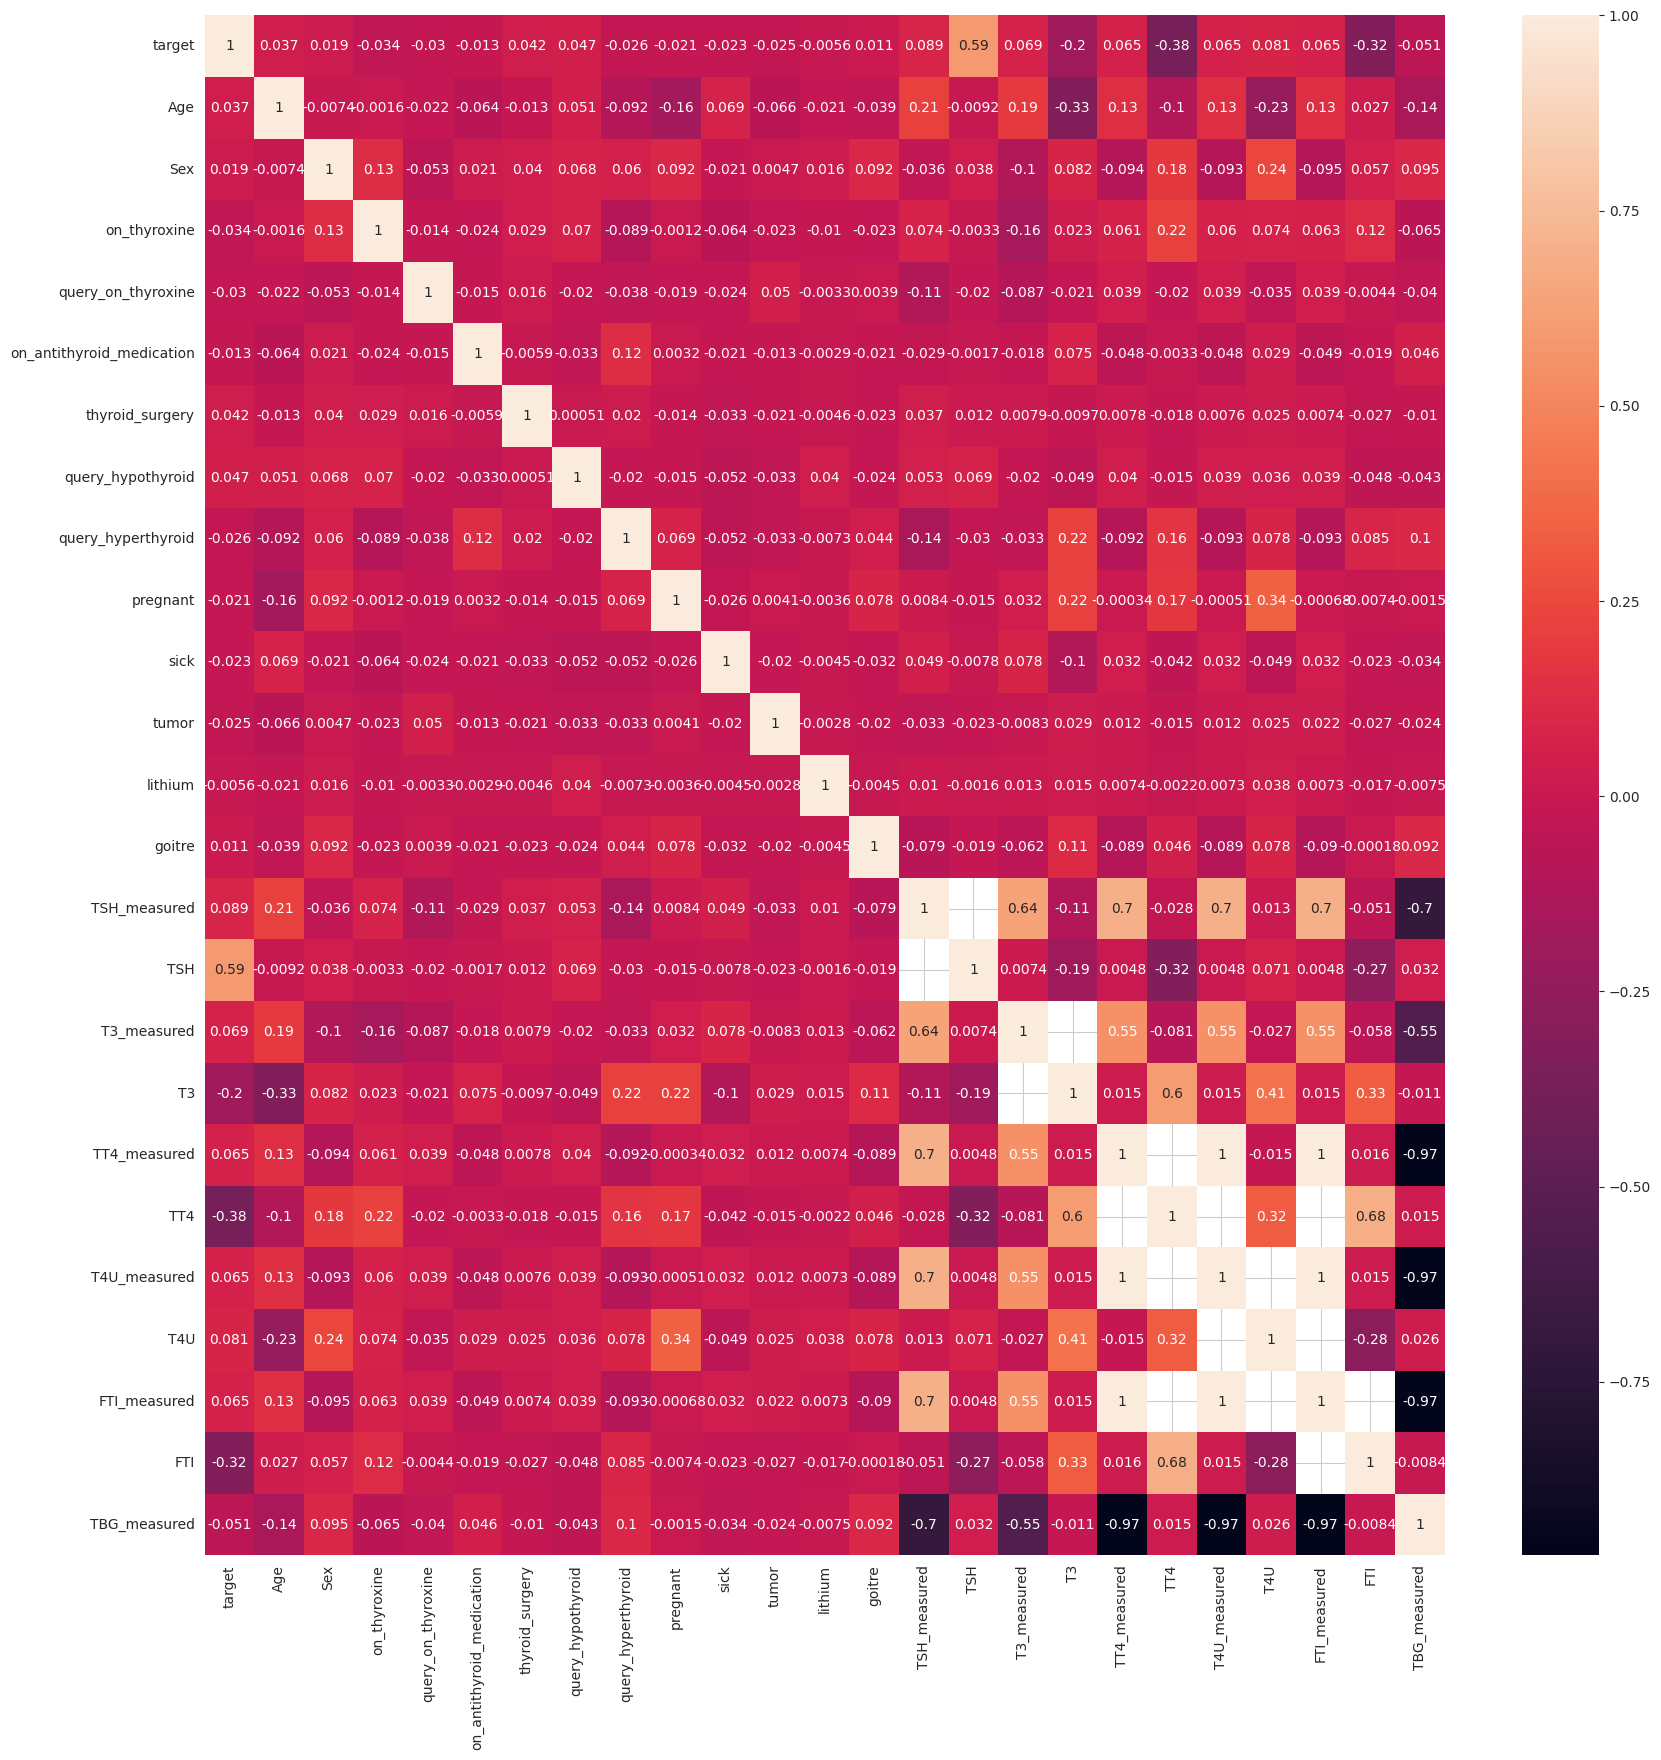

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()


In [ ]:
dataset.tail(100)

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
3063,0,25.0,1.0,0,0,0,0,0,1,0,...,6.7,0,NaN,1,114.0,1,1.19,1,96.0,0
3064,0,61.0,1.0,0,0,0,0,0,0,0,...,1.5,1,1.7,1,111.0,1,0.94,1,118.0,0
3065,0,NaN,1.0,0,0,0,0,0,0,0,...,0.0,1,1.6,1,103.0,1,0.90,1,115.0,0
3066,0,74.0,1.0,1,0,0,0,0,0,0,...,21.0,1,1.8,1,126.0,1,1.18,1,107.0,0
3067,0,78.0,0.0,0,0,0,0,0,1,0,...,0.0,1,1.8,1,107.0,1,0.86,1,124.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,58.0,1.0,0,0,0,0,0,0,0,...,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0
3159,0,29.0,1.0,0,0,0,0,0,0,0,...,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0
3160,0,77.0,0.0,0,0,0,0,0,0,0,...,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0
3161,0,74.0,1.0,0,0,0,0,0,0,0,...,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree


In [ ]:
import seaborn as sns
sns.pairplot(dataset, hue="hypothyroid")

ValueError: ignored